## Method

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine      Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## All imports

In [1]:
# Fetch all neccessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline

In [2]:
# Set the path to housing csv file
housing = pd.read_csv(r'housing.csv')

In [3]:
# Create a function to display a confusion matrix
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

#### Storing the data in the way we want it


In [4]:
# Removes all instances where median house value is equal to or larger than 500 000.
# To avoid teaching a model that the max value is 500 000.
housing_clean = housing[housing["median_house_value"] <= 500000]

# Drop all null values. 
housing_clean = housing_clean.dropna()

# Prints the first 5 and last 5 values in the DataFrame
housing_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# With dummy varible convert column 'ocean_proximity' into float64 values.
ocean_proximity_matrix = pd.get_dummies(pd.Series(housing["ocean_proximity"]), dtype=float)
ocean_proximity_matrix

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [6]:
# Remove cloumn 'ocean_proximity' with object values and join the new matrix where 'ocean_proximity'
# has been converted to float46-values with the get_dummies() function in pandas.
housing_modified = housing_clean.copy()
housing_modified = housing_modified.drop('ocean_proximity', axis=1)
housing_modified_ocean = pd.concat([housing_modified, ocean_proximity_matrix], axis=1)

# The data has missing values in the column 'total_bedrooms'.
# As the amount of instances containing null data is less than 1%,
# it is directly removed.
housing_modified_ocean.dropna(inplace=True)
housing_modified_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Create a copy.
X = housing_modified_ocean.copy() 

# Drop the median_house_value column and ensure that it is removed permanently
X = X.drop(columns = ['median_house_value'])

# Print the first 5 and last 5 rows of X.
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19475 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19475 non-null  float64
 1   latitude            19475 non-null  float64
 2   housing_median_age  19475 non-null  float64
 3   total_rooms         19475 non-null  float64
 4   total_bedrooms      19475 non-null  float64
 5   population          19475 non-null  float64
 6   households          19475 non-null  float64
 7   median_income       19475 non-null  float64
 8   <1H OCEAN           19475 non-null  float64
 9   INLAND              19475 non-null  float64
 10  ISLAND              19475 non-null  float64
 11  NEAR BAY            19475 non-null  float64
 12  NEAR OCEAN          19475 non-null  float64
dtypes: float64(13)
memory usage: 2.1 MB


In [9]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000
mean,-119.564306,35.653372,28.378074,2620.491142,539.645751,1440.290732,501.093504,3.676739,0.436714,0.332169,0.000257,0.106650,0.124211
std,2.006241,2.150250,12.515373,2184.938093,422.413200,1144.399323,383.206416,1.569263,0.495991,0.471004,0.016021,0.308675,0.329830
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.760000,33.930000,18.000000,1441.000000,297.000000,796.000000,282.000000,2.526500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1178.000000,411.000000,3.451900,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-117.990000,37.730000,37.000000,3118.000000,648.000000,1743.000000,606.000000,4.583300,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Transfer the label to y, the value we later want to predict.
y = housing_modified_ocean['median_house_value'].copy()
y.info()

<class 'pandas.core.series.Series'>
Index: 19475 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
19475 non-null  float64
dtypes: float64(1)
memory usage: 304.3 KB


In [11]:
# Shows the mean value, count and some similar information. 
y.describe()

count     19475.000000
mean     192444.651913
std       97702.625782
min       14999.000000
25%      116500.000000
50%      173800.000000
75%      248100.000000
max      500000.000000
Name: median_house_value, dtype: float64

In [12]:
# Prints the first 5 and last 5 of the Series.
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 19475, dtype: float64

In [13]:
# Split the gotten data into validation and test portions.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Scales the data to fit the mean 0 and the standard deviation.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)

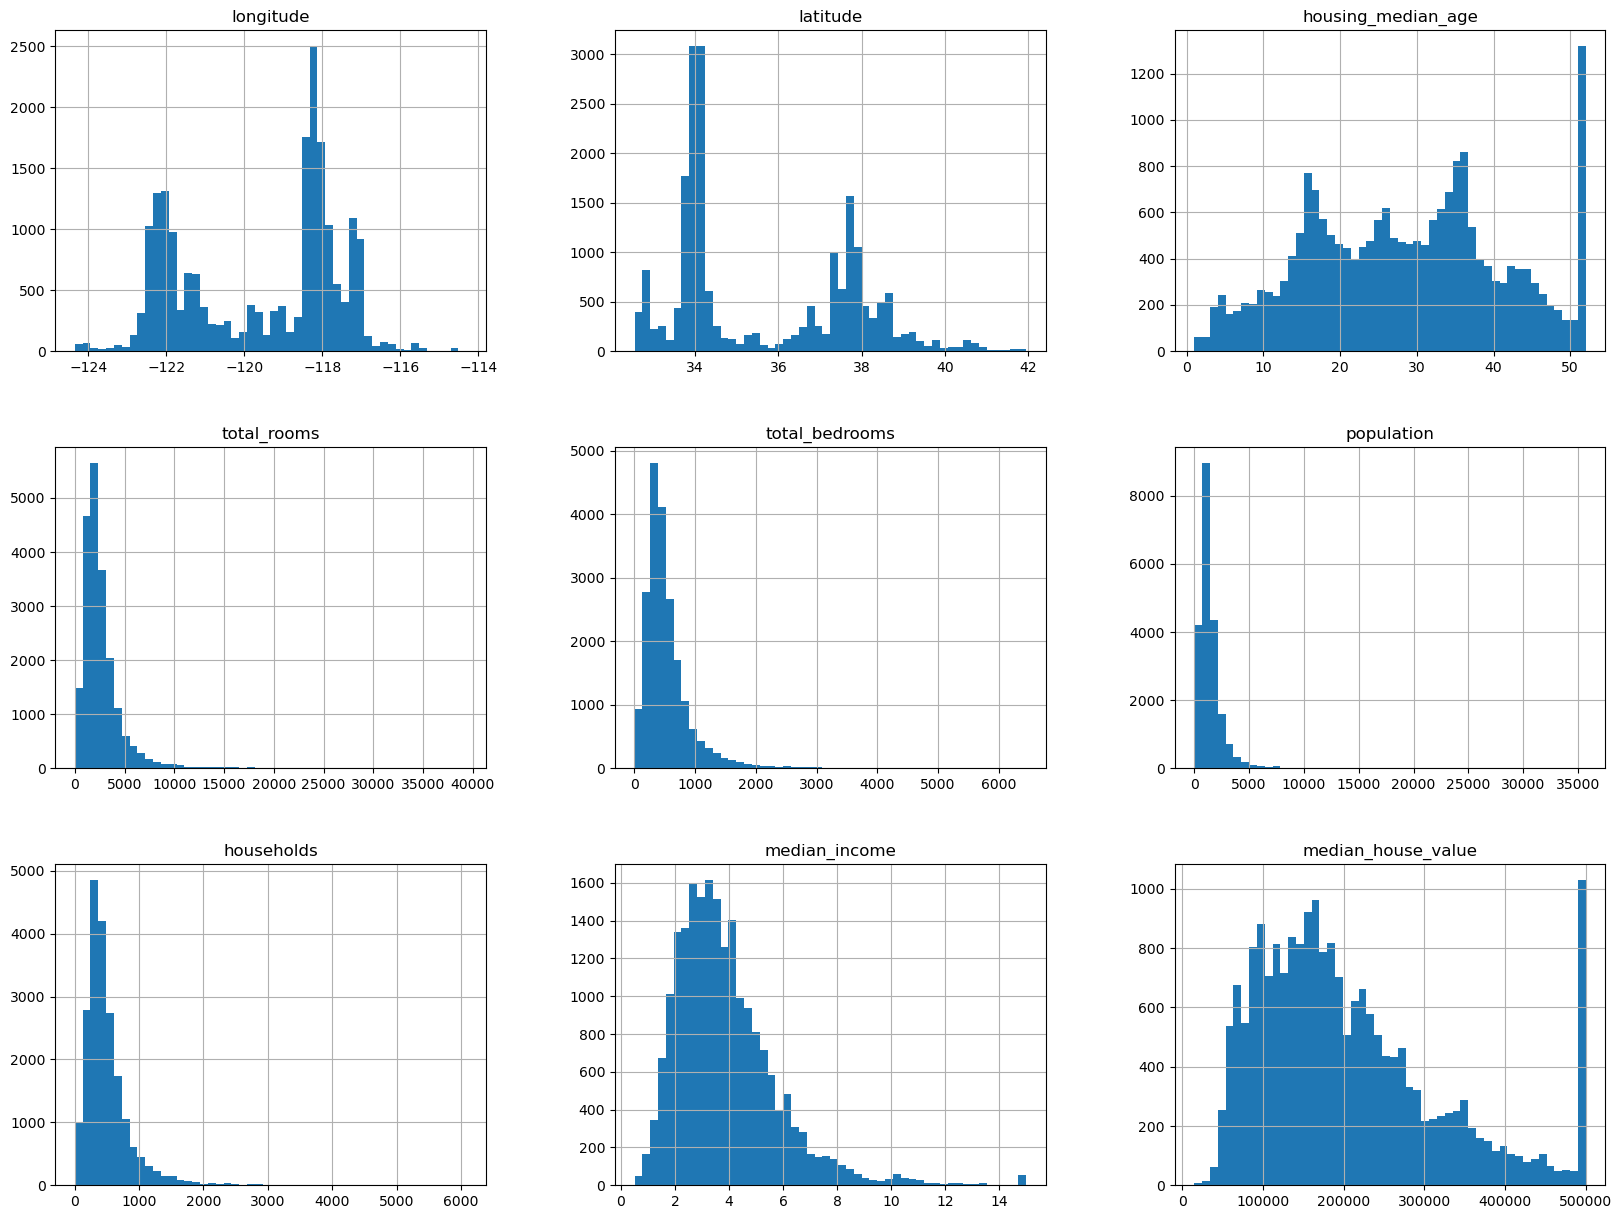

In [15]:
# Quick overview of the whole dataset.
housing.hist(bins=50, figsize=(20, 15))
print()

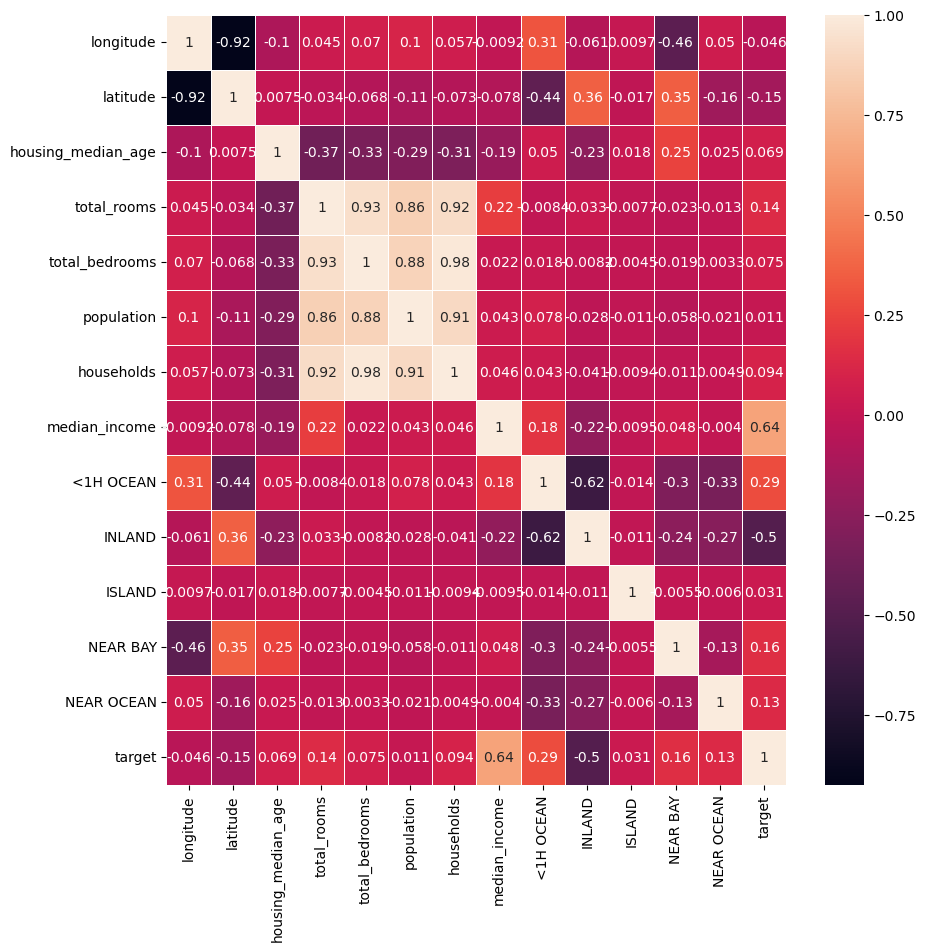

In [16]:
# Placing all the data in "df" so that it can be manipulated to create a nice correlation plot
# without affecting the actual dataset used when training the models.
df = housing_modified_ocean.copy()

# Creates a new column to set the target to the value that will later be predicted.
df["target"] = housing_modified_ocean['median_house_value']
df.drop(columns=['median_house_value'], inplace=True)

# Calls the function to create a correlation matrix.
correlation_matrix = df.corr()

# Plots the heatmap to visualize the correlation
fig, ax = plt.subplots(figsize=(10,10))   
ax = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

# The interesting row is the last one where target meets the other values.

C:\Users\wilma\AppData\Local\Temp\ipykernel_29268\3435413707.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


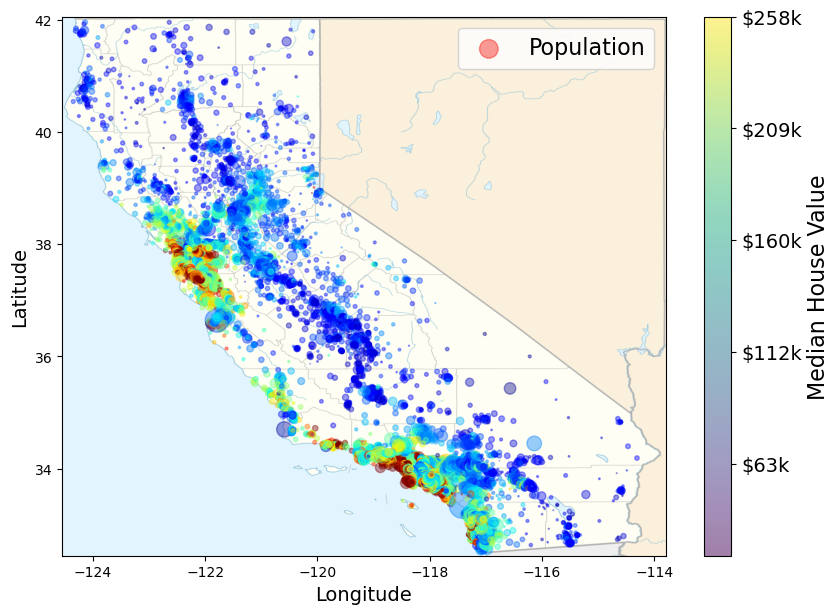

In [17]:
# Creates a heatmap over a map of California to visualize the price difference depending on geographical location.

california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.set_label('Median House Value', fontsize=16)
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


plt.legend(fontsize=16)
plt.show()

 The correlation coefficient between median house value and median income is 0.6393


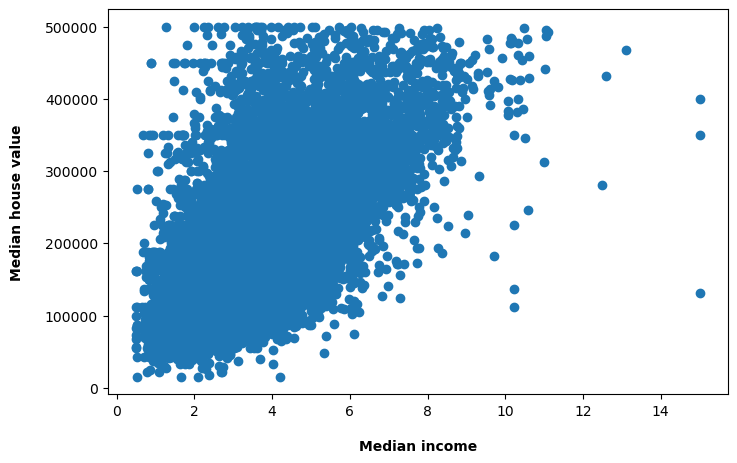

In [18]:
# Scatterplot between median income and median house value
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_train['median_income'], y_train, alpha=1)
ax.set_ylabel('Median house value', labelpad=15, fontweight='bold')
ax.set_xlabel('Median income', labelpad=15, fontweight='bold')
 
correlation = np.corrcoef(X_train['median_income'], y_train)
print(f' The correlation coefficient between median house value and median income is {round(correlation[1][0], 4)}')

 The correlation coefficient between median house value and total rooms is 0.1432


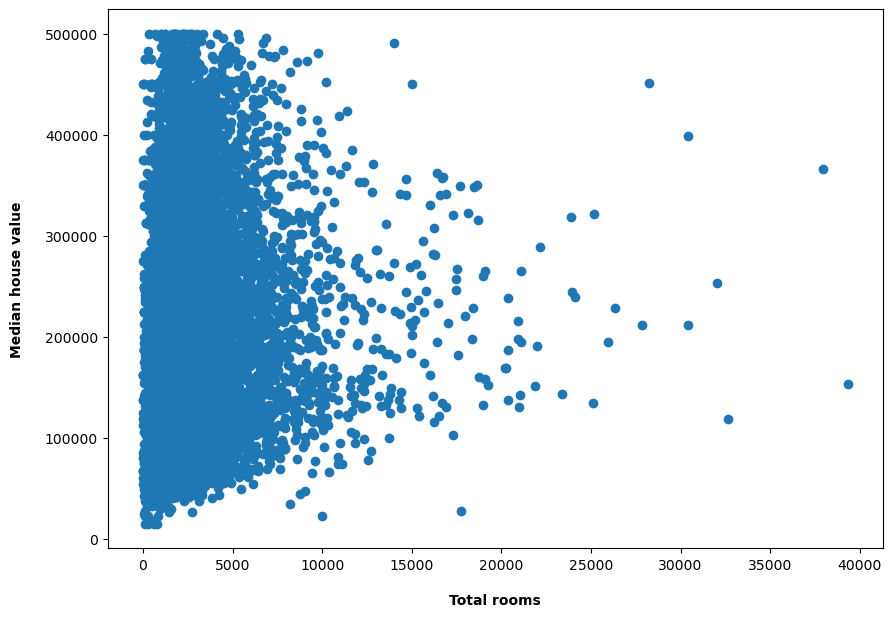

In [19]:
# Scatterplot between total rooms and median house value
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X_train['total_rooms'], y_train, alpha=1)
ax.set_ylabel('Median house value', labelpad=15, fontweight='bold')
ax.set_xlabel('Total rooms', labelpad=15, fontweight='bold')
 
correlation = np.corrcoef(X_train['total_rooms'], y_train)
print(f' The correlation coefficient between median house value and total rooms is {round(correlation[1][0], 4)}')

## Model Selection

1. Linear Regression 
2. Lasso 
3. Random Forest Regression
4. Beslutsträd
5. SVM
6. Extra Tree

In [20]:
y_train.describe()

count     15580.000000
mean     192150.461874
std       97522.058825
min       14999.000000
25%      116300.000000
50%      173900.000000
75%      246600.000000
max      500000.000000
Name: median_house_value, dtype: float64

In [24]:
lin_reg = LinearRegression(fit_intercept=True)

scores_lr = cross_validate(lin_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_lr))
print('RMSE:', np.sqrt(np.mean(-scores_lr)))

RMSE for each iteration: [61794.51759482 61614.96332823 59623.13495438]
RMSE: 61018.806752520395


In [23]:
lasso = Lasso()
hyper_param_lasso = {'alpha':(0.01, 1, 2, 5, 10, 15)}
lasso_reg = GridSearchCV(lasso, hyper_param_lasso, cv = 5)
lasso_reg.fit(X_train_scaled, y_train) 

print(lasso_reg.best_params_) 

scores_lasso = cross_validate(lasso_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]

print('RMSE for each iteration:', np.sqrt(-scores_lasso))

print('RMSE:', np.sqrt(np.mean(-scores_lasso)))

C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.622e+12, tolerance: 1.341e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.581e+12, tolerance: 1.322e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+12, toleranc

C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+12, tolerance: 1.330e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.636e+12, tolerance: 1.336e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.599e+12, toleranc

{'alpha': 15}


C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+12, tolerance: 8.835e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+12, tolerance: 8.847e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+12, toleranc

C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e+12, tolerance: 8.850e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+12, tolerance: 8.847e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+12, toleranc

C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+12, tolerance: 8.934e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+12, tolerance: 8.902e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+12, toleranc

C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.374e+10, tolerance: 8.905e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+12, tolerance: 8.995e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+12, toleranc

C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+12, tolerance: 8.925e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e+12, tolerance: 8.923e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+12, toleranc

RMSE for each iteration: [61792.9072054  61622.68304236 59612.23125243]
RMSE: 61017.31055235637


C:\Users\wilma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.575e+10, tolerance: 9.931e+09
  model = cd_fast.enet_coordinate_descent(


In [25]:
# Takes approximately 30 min to run...
forest = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 100, 120],
    'max_depth' : [None, 10],
}
forest_reg = GridSearchCV(forest, param_grid=param_grid, cv= 5)
forest_reg.fit(X_train_scaled, y_train)

print(forest_reg.best_params_)

scores_forest = cross_validate(forest_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_forest))
print('RMSE:', np.sqrt(np.mean(-scores_forest)))

{'max_depth': None, 'n_estimators': 120}
RMSE for each iteration: [46101.3504826  46729.84511529 45682.7605112 ]
RMSE: 46173.32400402583


In [ ]:
forest = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 100, 120],
    'max_depth' : [None, 5, 10],
}
forest_reg = GridSearchCV(forest, param_grid=param_grid, cv= 5)
forest_reg.fit(X_train_scaled, y_train)

print(forest_reg.best_params_)

scores_forest = cross_validate(forest_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_forest))
print('RMSE:', np.sqrt(np.mean(-scores_forest)))

In [ ]:
# havn't test runned it 
svm_clf = LinearSVC(max_iter=5000, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_clf.score(X_test, y_test)

In [ ]:
# havn't test runned it 
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train_scaled, y_train)
clf.score(X_test, y_test)